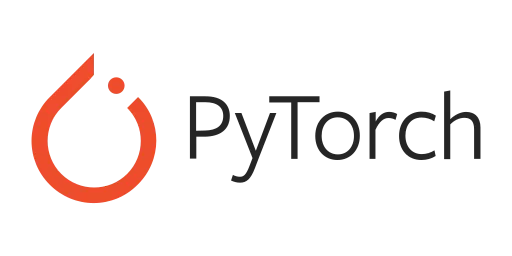

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치 모듈 구조

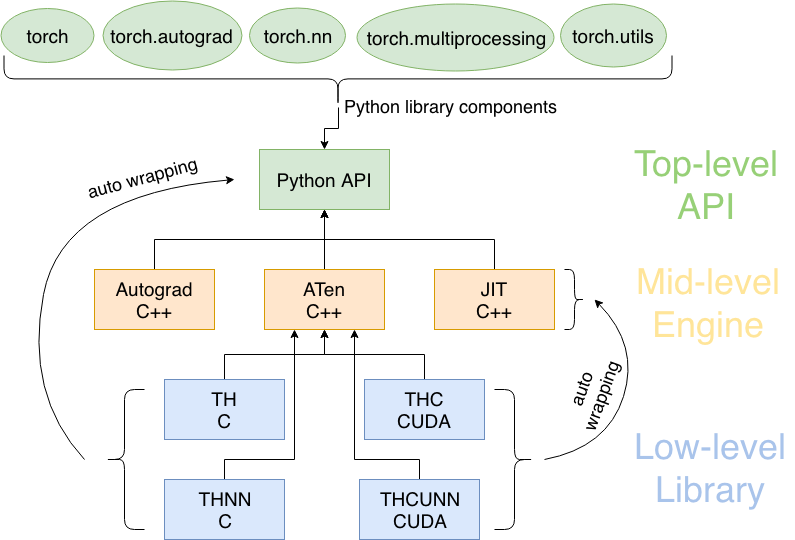

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

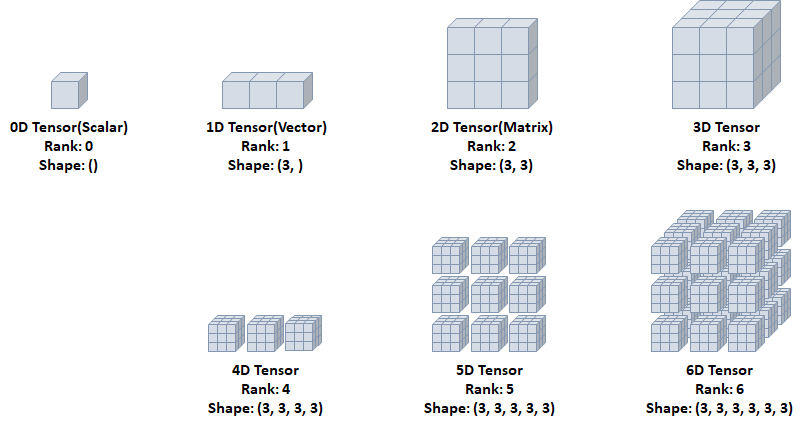

In [1]:
import torch
torch.__version__

'2.0.1+cu118'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4, 2)
print(x)

tensor([[-1.2945e-25,  4.4117e-41],
        [ 9.3744e-38, -7.5125e+25],
        [ 7.5108e+22,  4.4118e-41],
        [ 3.9805e+32,  4.4118e-41]])


무작위로 초기화된 텐서

In [3]:
x = torch.rand(4, 2)
print(x)

tensor([[0.1682, 0.7059],
        [0.6891, 0.2348],
        [0.6541, 0.9577],
        [0.0157, 0.5839]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [4]:
x = torch.zeros(4, 2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [148]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [149]:
x = x.new_ones(2, 4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [150]:
x = torch.randn_like(x, dtype = torch.float)
print(x)

tensor([[ 0.0383, -0.8034,  0.4139,  1.5669],
        [-0.3901, -0.4095,  1.3361,  0.6302]])


텐서의 크기 계산

In [151]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [9]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [10]:
# type casting
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [11]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [12]:
print(it.float())
print(it.double())
print(it.half())


tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [13]:
x = torch.randn(1)
print(x)
print(x.item()) # 실제값
print(x.dtype)

tensor([-0.0608])
-0.06077650189399719
torch.float32


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU cuda가 설치되어 있다면 cuda 사용
print(device)
y = torch.ones_like(x, device=device)
# colab의 런타임 유형변경에서 하드웨어 가속기로 cpu, gpu, tpu를 선택할 수 있다. gpu로 설정
print(y)
x = x.to(device) # x tensor를 gpu cuda로 보낸다.
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([-0.0608], device='cuda:0')
tensor([0.9392], device='cuda:0')
tensor([0.9392], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [15]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [16]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

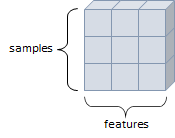

In [17]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

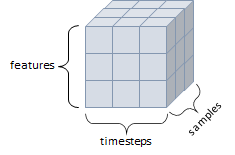

In [18]:
t3 = torch.tensor([[[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

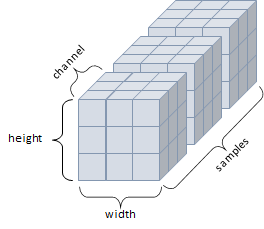

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [19]:
import math

a = torch.rand(1, 2) * 2 -1
print(a)
print(torch.abs(a))
print(torch.ceil(a))   # 올림
print(torch.floor(a))  # 내림
print(torch.clamp(a, -0.5, 0.5)) # -0.5 ~ 0.5 사이에 위치하도록 clamp

tensor([[ 0.5245, -0.0974]])
tensor([[0.5245, 0.0974]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.5000, -0.0974]])


In [20]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))

tensor([[ 0.5245, -0.0974]])
tensor(-0.0974)
tensor(0.5245)
tensor(0.2135)
tensor(0.4398)
tensor(-0.0511)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [21]:
x = torch.rand(2, 2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.4013, 0.7486],
        [0.8285, 0.4677]])
torch.return_types.max(
values=tensor([0.8285, 0.7486]),
indices=tensor([1, 0]))
torch.return_types.max(
values=tensor([0.7486, 0.8285]),
indices=tensor([1, 0]))


In [22]:
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.4013, 0.7486],
        [0.8285, 0.4677]])
torch.return_types.min(
values=tensor([0.4013, 0.4677]),
indices=tensor([0, 1]))
torch.return_types.min(
values=tensor([0.4013, 0.4677]),
indices=tensor([0, 1]))


In [23]:
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)

tensor([[0.1618, 0.4008],
        [0.9541, 0.6600]])
tensor([[0.9209, 0.6578],
        [0.0883, 0.3274]])


`torch.add`: 덧셈

In [24]:
print(x + y)
print(torch.add(x, y))

tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])
tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])


결과 텐서를 인자로 제공

In [25]:
result = torch.empty(2, 2)
torch.add(x, y, out = result)
print(result)

tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [26]:
print(x)
print(y)
y.add_(x) # y에 x를 더한 값을 y에 저장
print(y)

tensor([[0.1618, 0.4008],
        [0.9541, 0.6600]])
tensor([[0.9209, 0.6578],
        [0.0883, 0.3274]])
tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])


`torch.sub`: 뺄셈

In [27]:
print(x)
print(y)
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[0.1618, 0.4008],
        [0.9541, 0.6600]])
tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])
tensor([[-0.9209, -0.6578],
        [-0.0883, -0.3274]])
tensor([[-0.9209, -0.6578],
        [-0.0883, -0.3274]])
tensor([[-0.9209, -0.6578],
        [-0.0883, -0.3274]])


`torch.mul`: 곱셉

In [28]:
print(x)
print(y)
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[0.1618, 0.4008],
        [0.9541, 0.6600]])
tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])
tensor([[0.1752, 0.4242],
        [0.9946, 0.6517]])
tensor([[0.1752, 0.4242],
        [0.9946, 0.6517]])
tensor([[0.1752, 0.4242],
        [0.9946, 0.6517]])


`torch.div`: 나눗셈

In [29]:
print(x)
print(y)
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.1618, 0.4008],
        [0.9541, 0.6600]])
tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])
tensor([[0.1494, 0.3786],
        [0.9153, 0.6684]])
tensor([[0.1494, 0.3786],
        [0.9153, 0.6684]])
tensor([[0.1494, 0.3786],
        [0.9153, 0.6684]])


`torch.mm`: 내적(dot product)

In [30]:
print(x)
print(y)
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z)
print(torch.svd(z)) # 특이값분해(Singular Value Decomposition, SVD)

tensor([[0.1618, 0.4008],
        [0.9541, 0.6600]])
tensor([[1.0826, 1.0586],
        [1.0424, 0.9874]])
tensor([[0.5929, 0.5670],
        [1.7210, 1.6617]])
tensor([[0.5929, 0.5670],
        [1.7210, 1.6617]])
torch.return_types.svd(
U=tensor([[-0.3244, -0.9459],
        [-0.9459,  0.3244]]),
S=tensor([2.5290, 0.0038]),
V=tensor([[-0.7197, -0.6942],
        [-0.6942,  0.7197]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [31]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])

print(x[0, :])
print(x[1, :])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [32]:
x = torch.randn(4, 5)
print(x)
y = x.view(20) # 4x5를 flatten시킴. FC layer에 사용됨
print(y)
z = x.view(5, -1) # 행은 5이고 열에 -1을 넣어주면 알아서 계산해준다.
print(z)


tensor([[-0.2164,  1.0839,  0.2340, -0.7060, -0.4046],
        [ 1.4407, -1.3674,  1.7242,  0.5820,  0.5549],
        [ 0.0764, -0.2185, -0.6420,  1.2341, -0.7726],
        [ 0.4242, -0.7274,  0.8536, -1.4704,  1.2545]])
tensor([-0.2164,  1.0839,  0.2340, -0.7060, -0.4046,  1.4407, -1.3674,  1.7242,
         0.5820,  0.5549,  0.0764, -0.2185, -0.6420,  1.2341, -0.7726,  0.4242,
        -0.7274,  0.8536, -1.4704,  1.2545])
tensor([[-0.2164,  1.0839,  0.2340, -0.7060],
        [-0.4046,  1.4407, -1.3674,  1.7242],
        [ 0.5820,  0.5549,  0.0764, -0.2185],
        [-0.6420,  1.2341, -0.7726,  0.4242],
        [-0.7274,  0.8536, -1.4704,  1.2545]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [33]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.1081])
-0.1081320196390152
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [ ]:
x = torch.randn(2)
print(x)
print(x.item()) # error
print(x.dtype)

`squeeze`: 차원을 축소(제거)

In [34]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.0020, 0.2323, 0.7558],
         [0.1713, 0.6186, 0.9911],
         [0.5150, 0.5606, 0.2734]]])
torch.Size([1, 3, 3])


In [35]:
t = tensor.squeeze() # 차원 축소
print(t)
print(t.shape)

tensor([[0.0020, 0.2323, 0.7558],
        [0.1713, 0.6186, 0.9911],
        [0.5150, 0.5606, 0.2734]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [36]:
t = torch.rand(3, 3)
print(t)
print(t.shape)

tensor([[0.5209, 0.4881, 0.3365],
        [0.1575, 0.7681, 0.0521],
        [0.5838, 0.0029, 0.8866]])
torch.Size([3, 3])


In [37]:
tensor = t.unsqueeze(dim = 0) # 첫 번째 차원을 기준으로 unsqueeze
print(tensor)
print(tensor.shape)

tensor([[[0.5209, 0.4881, 0.3365],
         [0.1575, 0.7681, 0.0521],
         [0.5838, 0.0029, 0.8866]]])
torch.Size([1, 3, 3])


In [38]:
tensor = t.unsqueeze(dim = 2) # 세 번째 차원을 기준으로 unsqueeze
print(tensor)
print(tensor.shape)

tensor([[[0.5209],
         [0.4881],
         [0.3365]],

        [[0.1575],
         [0.7681],
         [0.0521]],

        [[0.5838],
         [0.0029],
         [0.8866]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [39]:
x = torch.FloatTensor([1, 4])
print(x)
y = torch.FloatTensor([2, 5])
print(y)
z = torch.FloatTensor([3, 6])
print(z)

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [40]:
a = torch.randn(1, 3, 3)
print(a)
b = torch.randn(1, 3, 3)
print(b)
c = torch.cat((a, b), dim=0) # 첫 번째 차원 기준으로 concatenate
print(c)
print(c.size())

tensor([[[ 0.0707,  1.0486,  0.4654],
         [-0.2628, -0.3380,  0.2542],
         [ 1.0614, -0.1721, -1.2062]]])
tensor([[[-0.6985,  2.2667,  0.1187],
         [-0.2207,  1.2095,  0.0743],
         [ 0.1558,  0.5851, -1.9720]]])
tensor([[[ 0.0707,  1.0486,  0.4654],
         [-0.2628, -0.3380,  0.2542],
         [ 1.0614, -0.1721, -1.2062]],

        [[-0.6985,  2.2667,  0.1187],
         [-0.2207,  1.2095,  0.0743],
         [ 0.1558,  0.5851, -1.9720]]])
torch.Size([2, 3, 3])


In [41]:
c = torch.cat((a, b), dim=1) # 두 번째 차원 기준으로 concatenate
print(c)
print(c.size())

tensor([[[ 0.0707,  1.0486,  0.4654],
         [-0.2628, -0.3380,  0.2542],
         [ 1.0614, -0.1721, -1.2062],
         [-0.6985,  2.2667,  0.1187],
         [-0.2207,  1.2095,  0.0743],
         [ 0.1558,  0.5851, -1.9720]]])
torch.Size([1, 6, 3])


In [42]:
c = torch.cat((a, b), dim=2) # 세 번째 차원 기준으로 concatenate
print(c)
print(c.size())

tensor([[[ 0.0707,  1.0486,  0.4654, -0.6985,  2.2667,  0.1187],
         [-0.2628, -0.3380,  0.2542, -0.2207,  1.2095,  0.0743],
         [ 1.0614, -0.1721, -1.2062,  0.1558,  0.5851, -1.9720]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [43]:
tensor = torch.rand(3, 6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1) # 3개로 나눈다.
print(t1)
print(t2)
print(t3)

tensor([[0.0853, 0.9924, 0.4148, 0.4364, 0.7457, 0.7219],
        [0.5444, 0.5515, 0.6231, 0.9964, 0.1711, 0.6747],
        [0.7803, 0.3481, 0.8983, 0.4117, 0.0919, 0.9845]])
tensor([[0.0853, 0.9924],
        [0.5444, 0.5515],
        [0.7803, 0.3481]])
tensor([[0.4148, 0.4364],
        [0.6231, 0.9964],
        [0.8983, 0.4117]])
tensor([[0.7457, 0.7219],
        [0.1711, 0.6747],
        [0.0919, 0.9845]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [44]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1) # chunk와 다르게 나눌때 dim 기준 만들고 싶은 크기를 입력

print(tensor)
print(t1)
print(t2)

tensor([[0.5084, 0.4248, 0.3193, 0.7829, 0.1568, 0.7864],
        [0.3124, 0.6326, 0.5778, 0.9194, 0.0025, 0.9443],
        [0.3820, 0.4959, 0.8954, 0.1323, 0.3872, 0.2470]])
tensor([[0.5084, 0.4248, 0.3193],
        [0.3124, 0.6326, 0.5778],
        [0.3820, 0.4959, 0.8954]])
tensor([[0.7829, 0.1568, 0.7864],
        [0.9194, 0.0025, 0.9443],
        [0.1323, 0.3872, 0.2470]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [45]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [46]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [47]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [48]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # a.add_(1)와 같은 기능
print(a)
print(b)
# CPU에 있으면 torch와 numpy가 메모리를 공유한다.
# GPU는 별도의 메모리가 있어 공유하지 않는다.

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [49]:
a = torch.randn(3, 3)
a = a * 3
print(a)
print(a.requires_grad) # requires_grad는 기본적으로 Flase로 설정됨

tensor([[ 1.9057, -1.8335,  3.4162],
        [-0.4573,  1.6748, -3.4574],
        [-0.3816,  0.6487,  3.0931]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [50]:
a.requires_grad_(True) # 언더바는 앞서 본것과 같이 inplace연산이어서 바꾼 값을 적용한다.
print(a.requires_grad)

b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(43.7658, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [51]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [52]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [53]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [54]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [55]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [56]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([-637.6091, -777.1117,   64.4387], grad_fn=<MulBackward0>)


In [57]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v) # v([0.1, 1.0, 0.0001])를 기준으로 backward를 진행

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [58]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [59]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [60]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [61]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [62]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [63]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [64]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [65]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [66]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [67]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [68]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-68-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(b.grad)


In [69]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-69-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(c.grad)


In [70]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-70-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(out.grad)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [71]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [72]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [73]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5), std=(1.0))])

In [74]:
trainset = datasets.MNIST(root='/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                          train=False, download=True,
                          transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 98539323.20it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 52782437.40it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25804890.90it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20774840.53it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [75]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [76]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

# images.shape 결과 [8, 1, 28, 28] : 28x28 이미지에 1은 흑백을 의미하고, 8은 batch size에 따라 8개이다.

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [77]:
torch_image = torch.squeeze(images[0]) # images[0]이거 하나에 대해서만 차원 축소
torch_image.shape

torch.Size([28, 28])

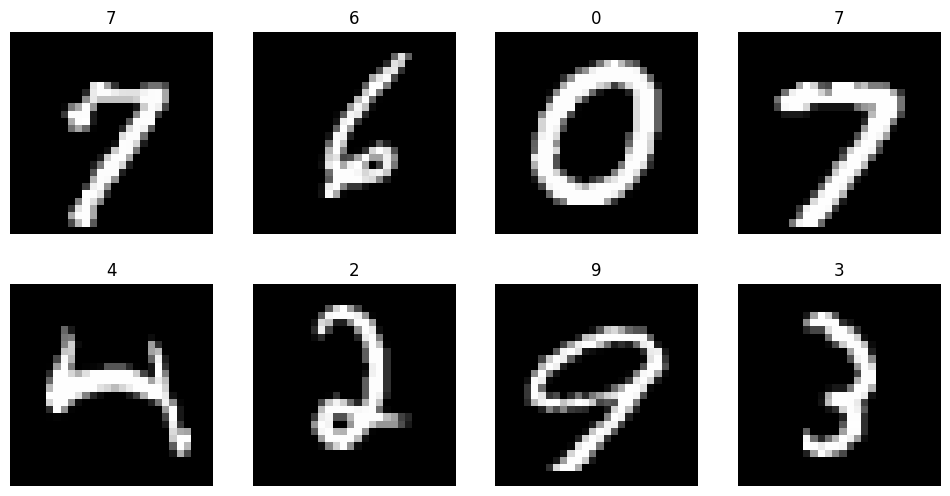

In [78]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [79]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [80]:
input = torch.randn(128, 20) # 20 features
print(input)

m = nn.Linear(20, 30) # features가 20이 들어가서 30이 나옴. output size -> torch.Size([128, 30])
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-1.2664e-01,  4.2868e-01, -4.4925e-01,  ..., -2.4397e-01,
         -4.5261e-01,  7.4556e-01],
        [ 3.1686e-01, -1.1260e+00,  6.3538e-04,  ..., -5.4416e-02,
         -9.6222e-01,  1.2016e+00],
        [ 1.4067e+00,  1.1651e+00,  1.1146e+00,  ..., -8.5818e-01,
          1.1328e+00, -1.0956e-01],
        ...,
        [-4.8163e-01,  4.3802e-01,  9.9994e-01,  ..., -1.4289e+00,
         -5.3109e-01, -5.3229e-01],
        [-5.8508e-01,  1.7183e+00,  2.8691e-01,  ...,  2.4701e-01,
         -2.9881e-01,  2.7022e+00],
        [-1.0109e-01,  5.9745e-01, -9.6407e-03,  ..., -1.1796e+00,
          1.0807e+00,  3.5499e-01]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.6463, -0.8653, -0.9734,  ..., -0.5114,  0.8366, -0.1191],
        [-0.0741, -0.2859,  0.0118,  ..., -0.5027, -0.0879,  0.6768],
        [-0.4920,  0.0572, -1.3613,  ...,  0.3345,  0.3156,  1.0762],
        ...,
        [ 0.1437, -0.4581, -0.7349,  ..., -0.6029,  0.1873, -0.9890],
        [-0.3535, -0.715

`nn.Conv2d` 계층 예시


In [81]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [82]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [83]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [84]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [85]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu')) # 위에서 인자 없이 똑같이 적용한거
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [86]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [87]:
weight = weight.detach()

In [88]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

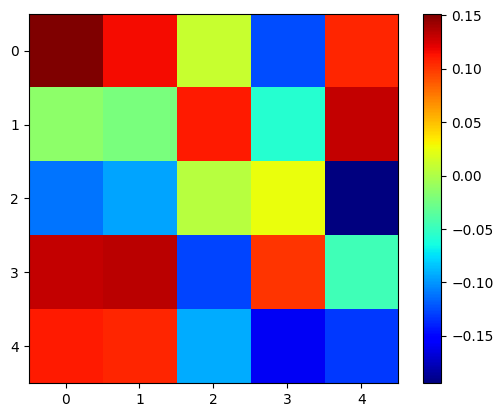

In [89]:
# Convolution layer 하나의 weight을 color로 표현
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [90]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [91]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

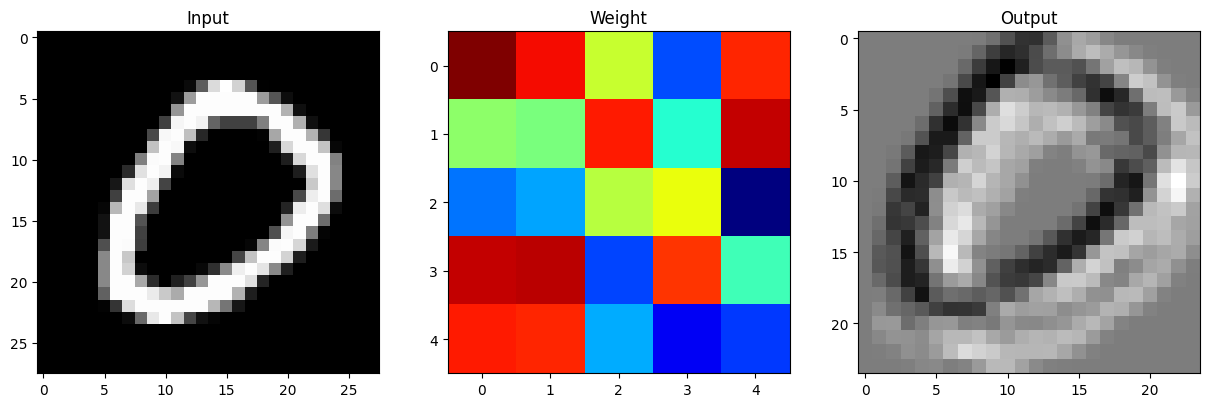

In [92]:
plt.figure(figsize = (15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [93]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [94]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

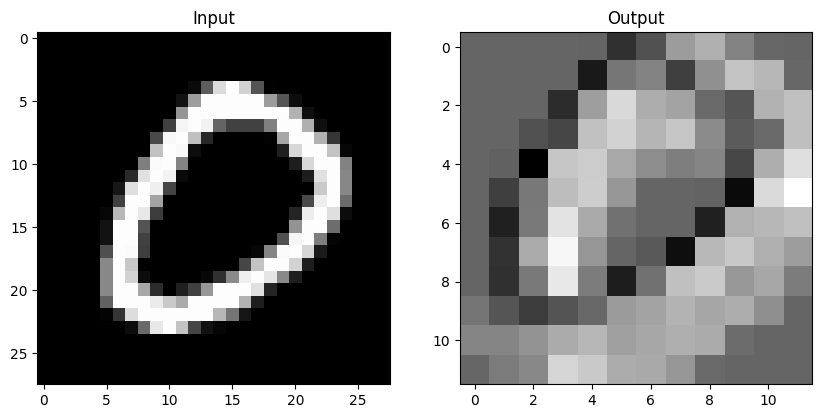

In [95]:
plt.figure(figsize = (10, 15))

plt.subplot(121)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [96]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [97]:
lin = nn.Linear(784, 10)(flatten) # out features는 10
lin.shape

torch.Size([1, 10])

In [98]:
lin

tensor([[-0.2336, -0.1314,  0.1651,  0.0204, -0.3540,  0.4005, -0.2636,  0.0153,
          0.0435, -0.2092]], grad_fn=<AddmmBackward0>)

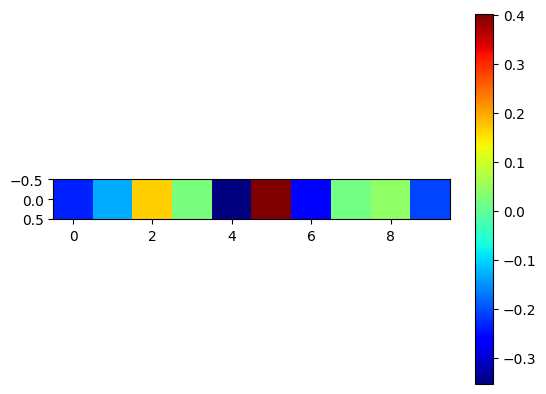

In [99]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [100]:
with torch.no_grad():
  flatten = input_image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.1105, 0.0833, 0.1274, 0.1078, 0.0698, 0.1361, 0.0899, 0.1287, 0.0908,
         0.0556]])

In [101]:
np.sum(softmax.numpy()) # 합을 확인해 보면 1이다. 즉 각각의 class가 나올 확률을 softmax로 구한다.

1.0

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [102]:
inputs = torch.randn(4, 3, 28, 28).to(device) # 컬러 사진 4개를 가정
inputs.shape

torch.Size([4, 3, 28, 28])

In [103]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs)) # conv layer -> activation function(relu)
output.shape

torch.Size([4, 20, 24, 24])

### 신경망 종류

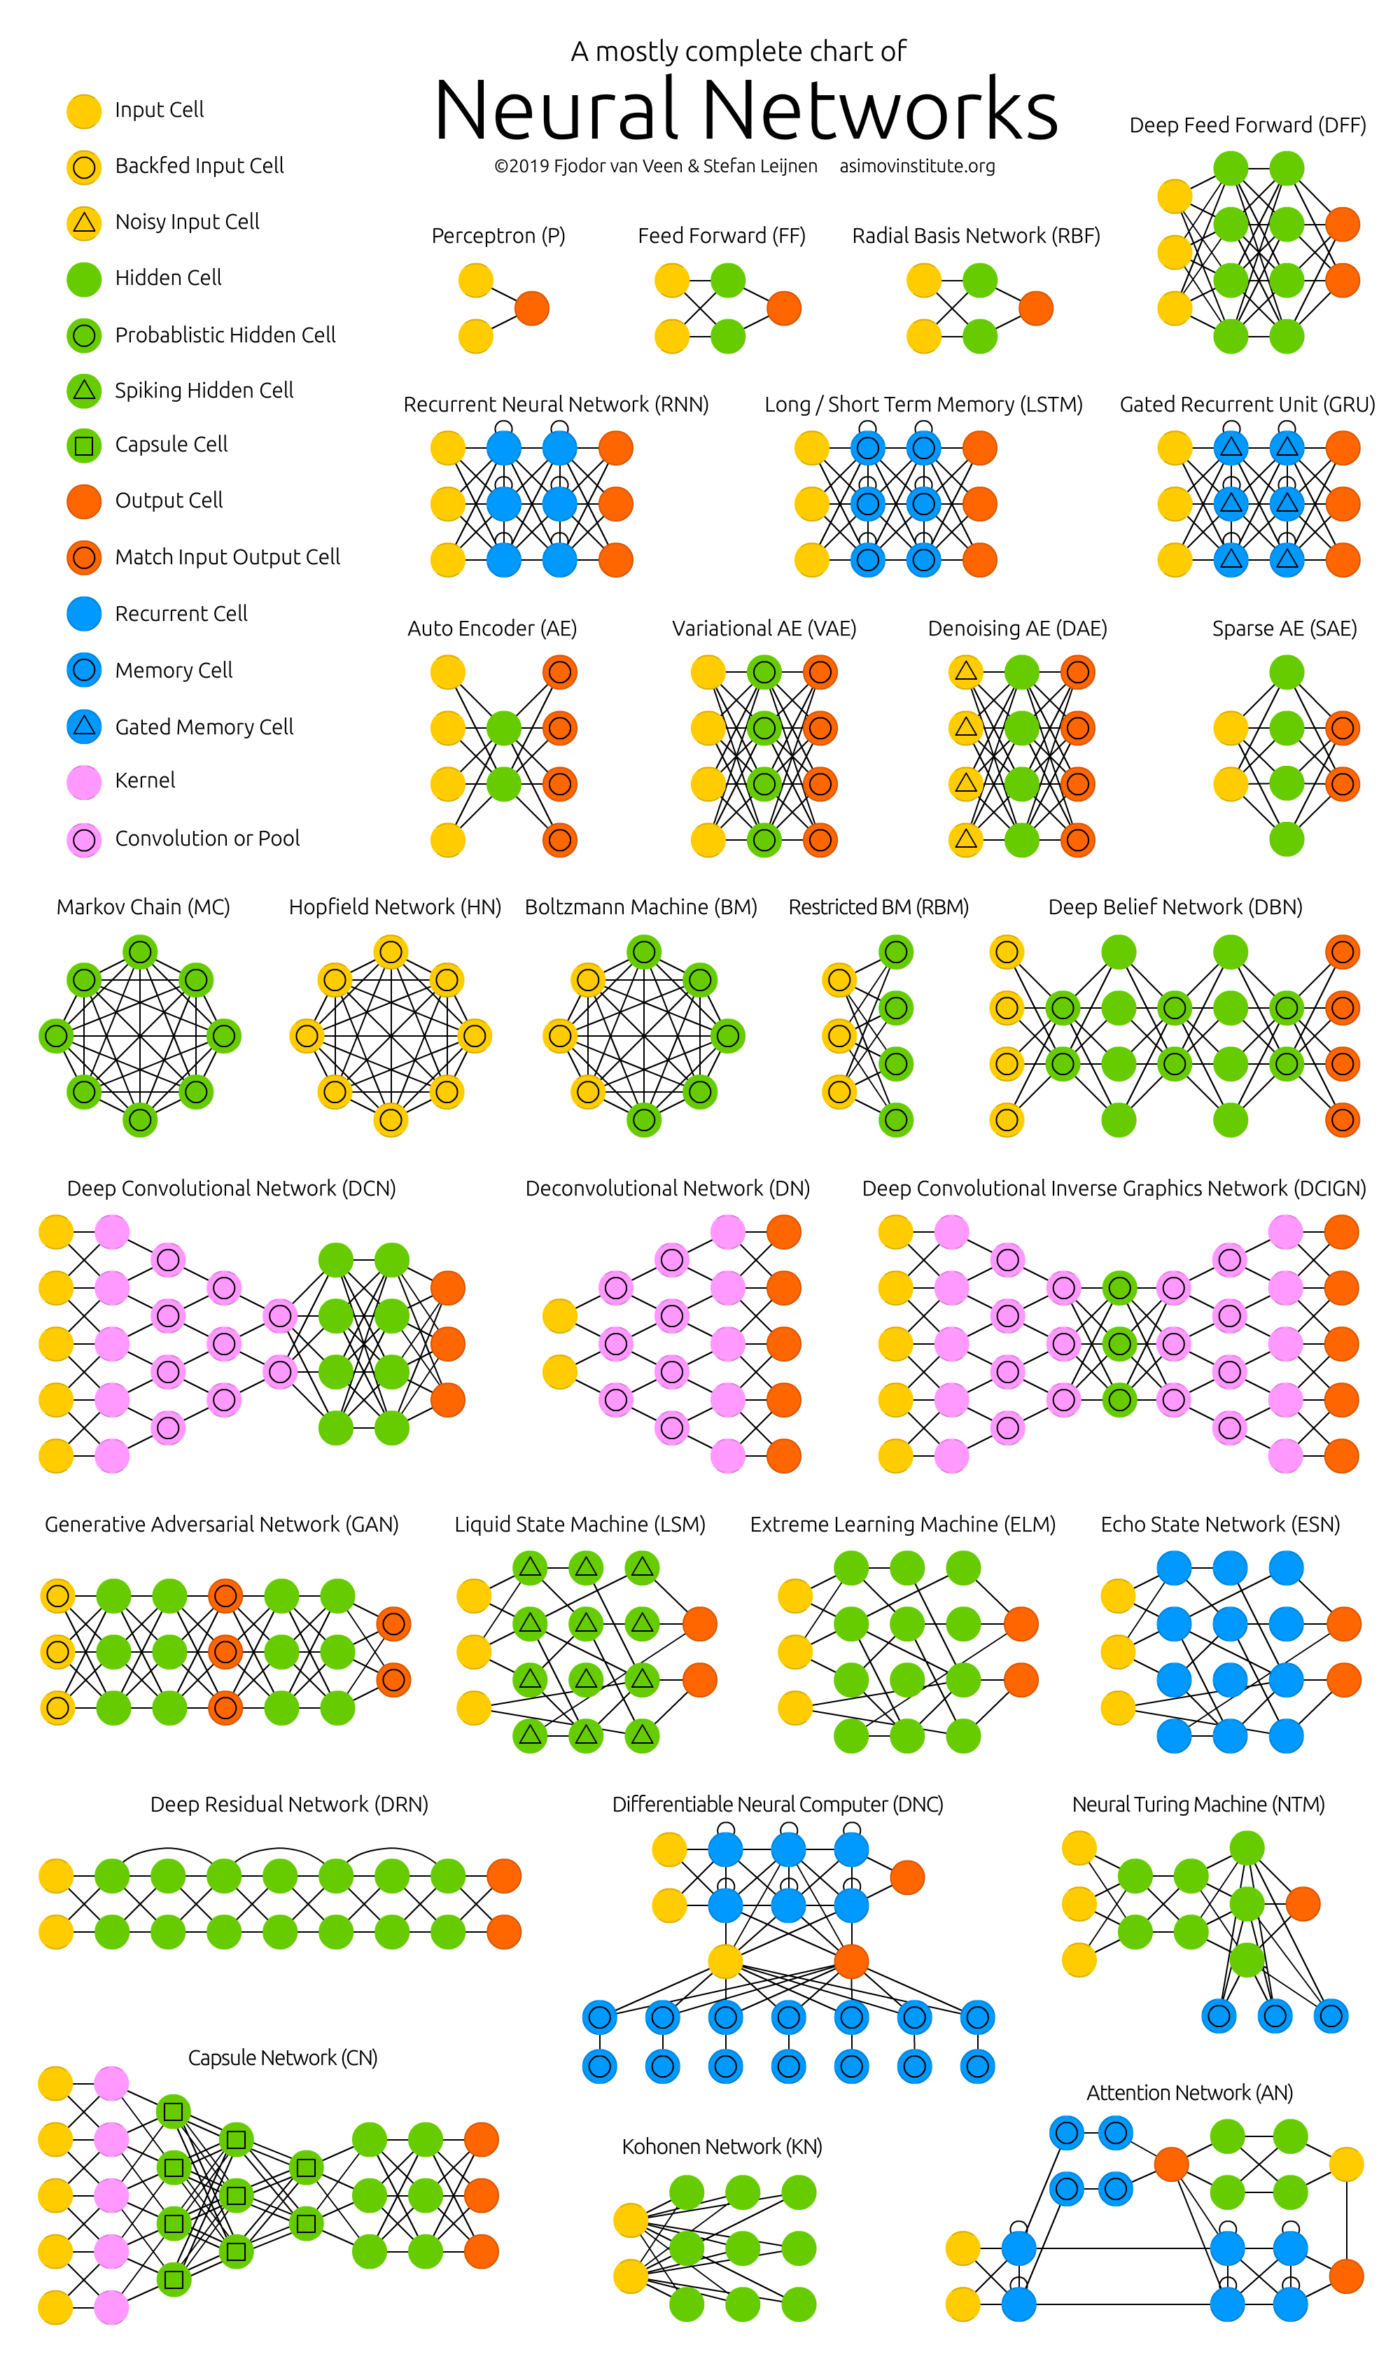

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [104]:
class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs, 1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.layer(x)
    x = self.activation(x)
    return x

In [105]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [106]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv3d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv3d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True)
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.shape[0], -1) # 마지막 layer3은 in_features=30*5*5로 입력받으므로 flat하게 펴준 다음에 넣어준다.
    x = self.layer3(x)
    return x

In [107]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv3d(3, 64, kernel_size=(5, 5, 5), stride=(1, 1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv3d(64, 30, kernel_size=(5, 5, 5), stride=(1, 1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv3d(3, 64, kernel_size=(5, 5, 5), stride=(1, 1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv3d(64, 30, kernel_size=(5, 5, 5), stride=(1, 1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [109]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [110]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 6.6 MB/s eta 0:00:00


In [120]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim = 1)
target = torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print(acc)

tensor([[0.3138, 0.0617, 0.2213, 0.3047, 0.0985],
        [0.5645, 0.0103, 0.0170, 0.0992, 0.3091],
        [0.0297, 0.0813, 0.0628, 0.7113, 0.1150],
        [0.4522, 0.0290, 0.0333, 0.1649, 0.3206],
        [0.3154, 0.5810, 0.0299, 0.0150, 0.0586],
        [0.3682, 0.0379, 0.3238, 0.0895, 0.1806],
        [0.1280, 0.3124, 0.1592, 0.1216, 0.2788],
        [0.0903, 0.2036, 0.0209, 0.1279, 0.5572],
        [0.3841, 0.2165, 0.1669, 0.0938, 0.1387],
        [0.2325, 0.0693, 0.1426, 0.4778, 0.0779]]) tensor([3, 4, 3, 3, 0, 2, 1, 4, 1, 4])
tensor(0.3000)


In [122]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10
for i in range(n_batches):
  preds = torch.randn(10, 5).softmax(dim = 1)
  target = torch.randint(5, (10, ))

  acc = metric(preds, target)
  print(acc)

acc = metric.compute()
print(acc)

tensor(0.2000)
tensor(0.1000)
tensor(0.1000)
tensor(0.)
tensor(0.1000)
tensor(0.4000)
tensor(0.3000)
tensor(0.1000)
tensor(0.1000)
tensor(0.2000)
tensor(0.1600)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

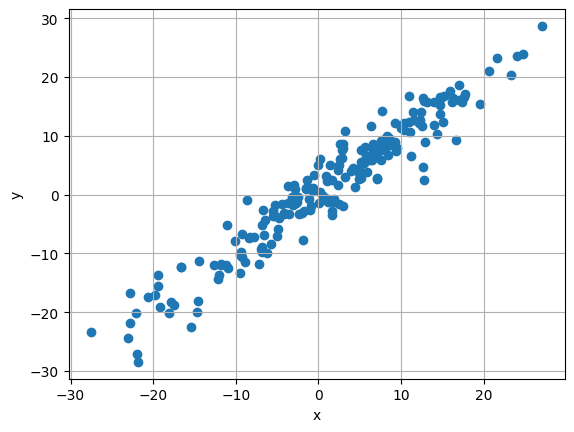

In [123]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [124]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [125]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.3468]], requires_grad=True), Parameter containing:
tensor([0.5762], requires_grad=True)]


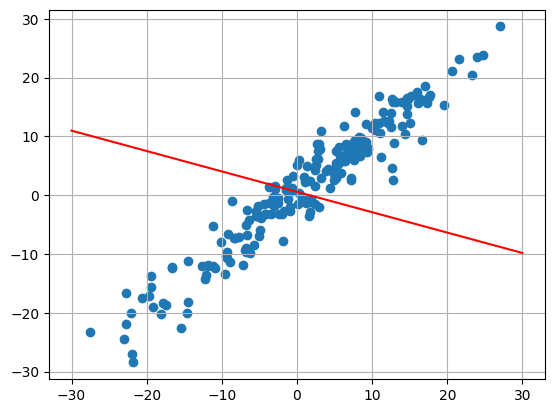

In [127]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [129]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [130]:
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

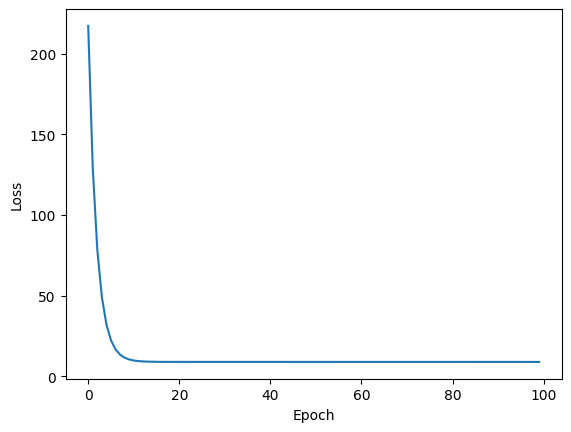

In [131]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

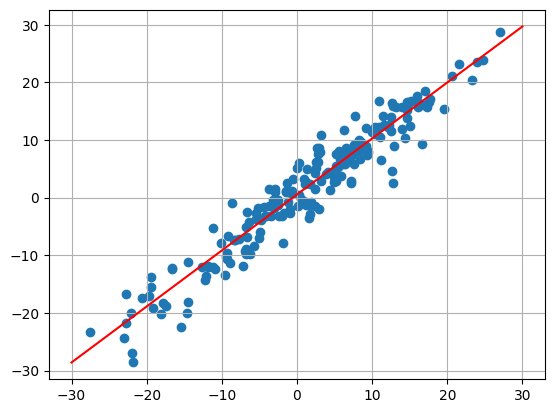

In [132]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [170]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### 데이터 로드

In [171]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])

In [172]:
trainset = datasets.FashionMNIST(root='/content/',
                                  train=True, download=True,
                                  transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                  train=False, download=True,
                                  transform=transform)

In [173]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=128, shuffle=False, num_workers=2)

In [174]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

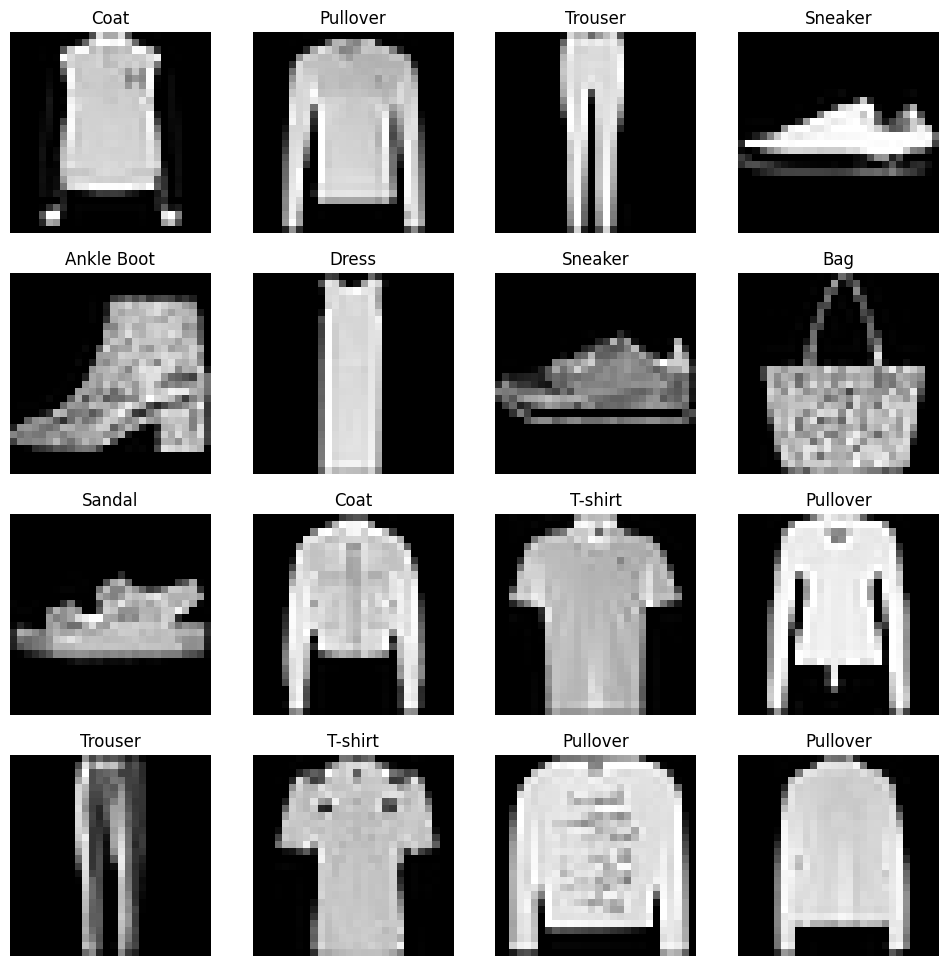

In [175]:
labels_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(12, 12))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')

plt.show()


### 모델 정의 및 파라미터

In [176]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # 최종 class는 10개

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s

    return num_features

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [177]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [178]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[-0.2251,  0.0656,  0.1055, -0.0564, -0.0018, -0.0202,  0.1087, -0.0851,
         -0.0426, -0.0049]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [179]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [180]:
total_batch = len(train_loader)
print(total_batch)

469


In [181]:
for epoch in range(10):

  running_loss = 0.0

  for i, data in enumerate(train_loader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 100 == 99:
      print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch: 1, Iter: 100, Loss: 0.11516403329372406
Epoch: 1, Iter: 200, Loss: 0.11467399632930755
Epoch: 1, Iter: 300, Loss: 0.11400861394405365
Epoch: 1, Iter: 400, Loss: 0.11291246116161346
Epoch: 2, Iter: 100, Loss: 0.10626572406291962
Epoch: 2, Iter: 200, Loss: 0.0865450502038002
Epoch: 2, Iter: 300, Loss: 0.055337539583444596
Epoch: 2, Iter: 400, Loss: 0.04268304282426834
Epoch: 3, Iter: 100, Loss: 0.03732012212276459
Epoch: 3, Iter: 200, Loss: 0.03516402405500412
Epoch: 3, Iter: 300, Loss: 0.034599765330553055
Epoch: 3, Iter: 400, Loss: 0.03382480052113533
Epoch: 4, Iter: 100, Loss: 0.03224035799503326
Epoch: 4, Iter: 200, Loss: 0.032822590827941894
Epoch: 4, Iter: 300, Loss: 0.030937677636742593
Epoch: 4, Iter: 400, Loss: 0.03172541064023972
Epoch: 5, Iter: 100, Loss: 0.030617569848895073
Epoch: 5, Iter: 200, Loss: 0.03034998306632042
Epoch: 5, Iter: 300, Loss: 0.028663567706942557
Epoch: 5, Iter: 400, Loss: 0.028662554159760475
Epoch: 6, Iter: 100, Loss: 0.028111238300800322
Epoch:

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [183]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [184]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [185]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [186]:
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16, 8))
  plt.imshow(np.transpose(npimg, (1, 2, 0))) # RGB를 GBR 순서로
  plt.show()

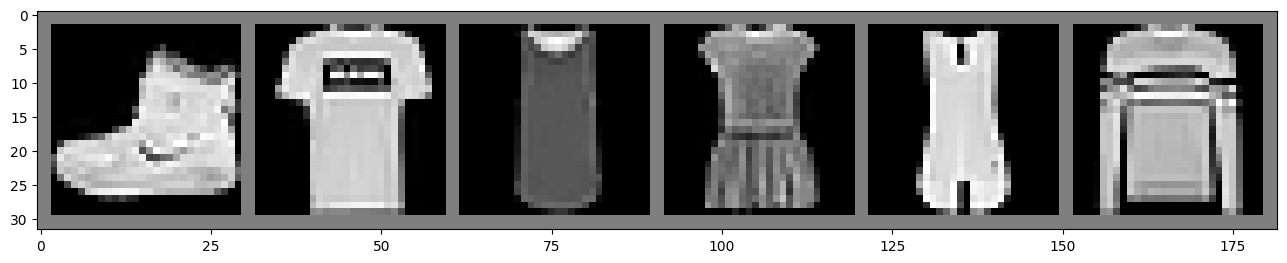

In [201]:
import torchvision

images, labels = next(iter(test_loader))
imshow(torchvision.utils.make_grid(images[:6]))

In [204]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([9, 0, 0, 0, 3, 2, 7, 4, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 2, 6, 3, 1, 4, 8,
        4, 4, 0, 2, 4, 4, 5, 3, 4, 6, 0, 8, 5, 0, 1, 6, 2, 7, 9, 5, 5, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 0, 0, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1,
        0, 3, 1, 4, 4, 0, 1, 5, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 6, 9, 3, 6,
        6, 1, 1, 8, 8, 3, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9, 6, 0, 3, 1, 5, 4, 6, 7,
        5, 5, 9, 2, 2, 6, 7, 1])


In [194]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, T-shirt, T-shirt, T-shirt, Dress, Pullover, 


In [197]:
correct = 0
total = 0

with torch.no_grad(): # 평가 하기 위해서 no_grad
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct / total)

82.755
